<h2>Extracción de datos en OSM y generación de cartografía</h2>
<h4>Utilizando <a href="https://osmnx.readthedocs.io/en/stable/">OSMnx</a>, <a href="https://geopandas.org/en/stable/">Geopandas</a> y <a href="https://plotly.com/python/">Plotly</a> para Python</h4>

<b> NOTEBOOK INDEX </b>
<a id='index'></a>
</br>[Importing libraries](#lib-imp)
</br>[Extracting geometries with OSMnx](#inp-par-def)
</br>[Data manipulation with Geopandas](#gpd)
</br>[Using Plotly.Express to plot](#plot)
</br>[Calc XY and write file](#calc-wrt)

----------------------------------------------------------------------------------------------

<b>LIBRARIES IMPORT</b>
<a id='lib-imp'></a>
</br>[Go back to Index](#index)

In [1]:
import osmnx as ox
import geopandas as gpd
import plotly.express as px

<b>EXTRACTING GEOMETRIES WITH OSMnx</b>
<a id='lib-imp'></a>
</br>[Go back to Index](#index)

In [2]:
#QUERY para OverpassAPI escrita en Overpass QL
#node(-37.35589769923015, -59.20554498345773, -37.28332889699108, -59.06877056497516)[highway = bus_stop];out;

In [3]:
#Los parámetros para la función son (north, south, east, west, tags)
result = ox.geometries.geometries_from_bbox(-37.28332889699108, -37.35589769923015, -59.06877056497516, -59.20554498345773, tags={'highway':'bus_stop'})

<b>DATA MANIPULATION WITH GEOPANDAS</b>
<a id='gpd'></a>
</br>[Go back to Index](#index)

<AxesSubplot: >

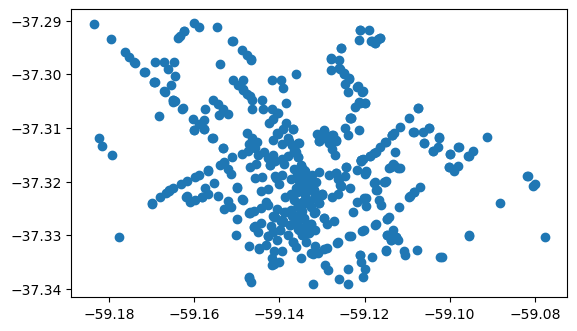

In [4]:
#OSMnx arroja como resultado un GeoDataFrame de Geopandas, así que podemos manipularlo con esta librería
result.plot()

In [5]:
#Imprimimos la tabla para corroborar los datos
result.head()

bus   highway local_ref public_transport  \
element_type osmid                                                  
node         1374318515  yes  bus_stop  El Verde         platform   
             1374318517  yes  bus_stop       NaN         platform   
             1374326949  yes  bus_stop       NaN         platform   
             1374326950  yes  bus_stop       NaN         platform   
             1374326953  yes  bus_stop       NaN         platform   

                                            geometry name  ref bench shelter  \
element_type osmid                                                             
node         1374318515  POINT (-59.12587 -37.29891)  NaN  NaN   NaN     NaN   
             1374318517  POINT (-59.12481 -37.29988)  NaN  NaN   NaN     NaN   
             1374326949  POINT (-59.11765 -37.29411)  NaN  NaN   NaN     NaN   
             1374326950  POINT (-59.11647 -37.29321)  NaN  NaN   NaN     NaN   
             1374326953  POINT (-59.11832 -37.29379)  NaN  NaN   NaN     NaN   

                        tactile_paving addr:street operator  bin  
element_type osmid                                                
node         1374318515            NaN         NaN      NaN  NaN  
             1374318517            NaN         NaN      NaN  NaN  
             1374326949            NaN         NaN      NaN  NaN  
             1374326950            NaN         NaN      NaN  NaN  
             1374326953            NaN         NaN      NaN  NaN

In [6]:
#Calculamos el valor de las coordenadas X e Y en WGS84
result["lat"] = result.geometry.y
result["lon"] = result.geometry.x
result.head()

bus   highway local_ref public_transport  \
element_type osmid                                                  
node         1374318515  yes  bus_stop  El Verde         platform   
             1374318517  yes  bus_stop       NaN         platform   
             1374326949  yes  bus_stop       NaN         platform   
             1374326950  yes  bus_stop       NaN         platform   
             1374326953  yes  bus_stop       NaN         platform   

                                            geometry name  ref bench shelter  \
element_type osmid                                                             
node         1374318515  POINT (-59.12587 -37.29891)  NaN  NaN   NaN     NaN   
             1374318517  POINT (-59.12481 -37.29988)  NaN  NaN   NaN     NaN   
             1374326949  POINT (-59.11765 -37.29411)  NaN  NaN   NaN     NaN   
             1374326950  POINT (-59.11647 -37.29321)  NaN  NaN   NaN     NaN   
             1374326953  POINT (-59.11832 -37.29379)  NaN  NaN   NaN     NaN   

                        tactile_paving addr:street operator  bin        lat  \
element_type osmid                                                            
node         1374318515            NaN         NaN      NaN  NaN -37.298915   
             1374318517            NaN         NaN      NaN  NaN -37.299876   
             1374326949            NaN         NaN      NaN  NaN -37.294106   
             1374326950            NaN         NaN      NaN  NaN -37.293210   
             1374326953            NaN         NaN      NaN  NaN -37.293790   

                               lon  
element_type osmid                  
node         1374318515 -59.125865  
             1374318517 -59.124811  
             1374326949 -59.117647  
             1374326950 -59.116467  
             1374326953 -59.118323

<b>USING PLOTLY EXPRESS TO PLOT</b>
<a id='plot'></a>
</br>[Go back to Index](#index)

C:\Users\USUARIO\anaconda3\envs\geo-env38\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



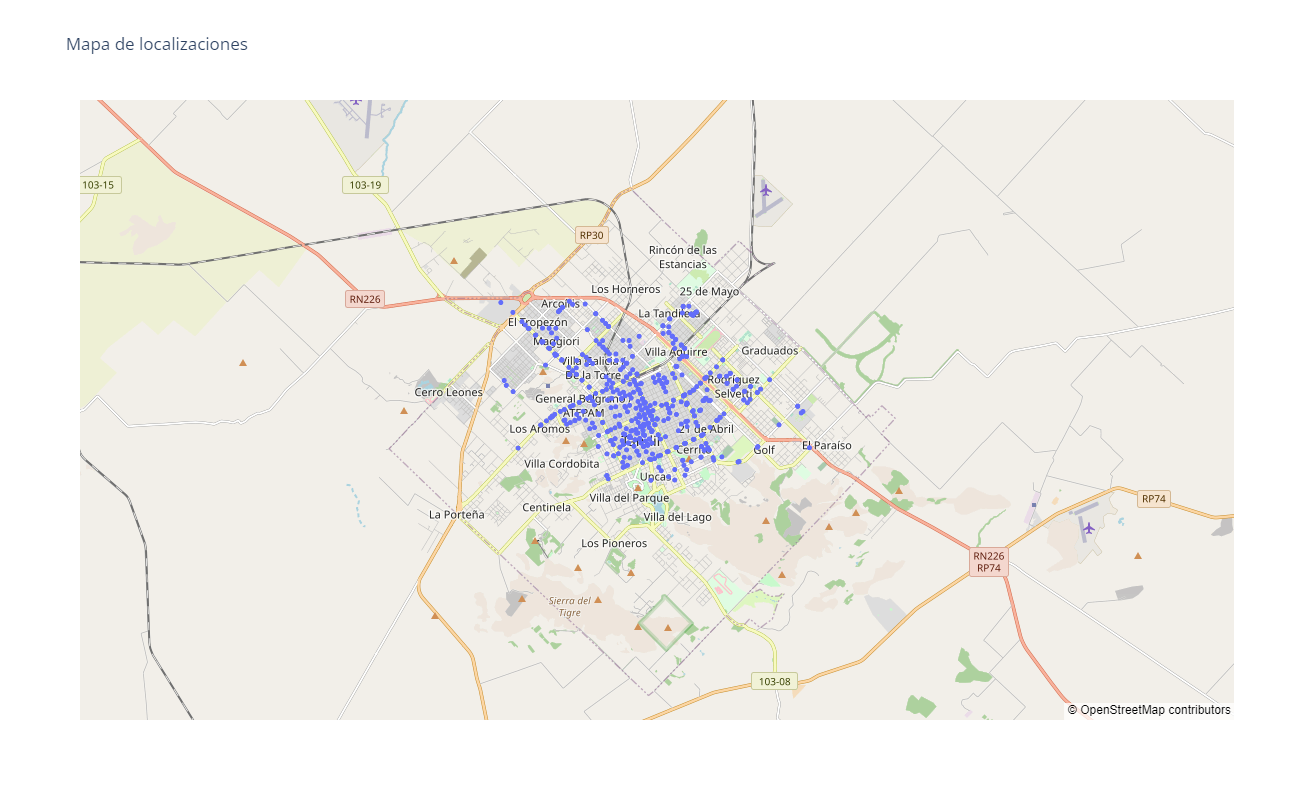

In [7]:
#SCATTER MAPBOX

fig = px.scatter_mapbox(
    result, 
    title="Mapa de localizaciones", 
    width=1000, 
    height=800, 
    lat=result.geometry.y, 
    lon=result.geometry.x,
    center=dict(lat=-37.32, lon=-59.13), 
    zoom=11, 
    mapbox_style="open-street-map", 
    labels={"lat":"Latitud","lon":"Longitud"},
    )
fig.show()

C:\Users\USUARIO\anaconda3\envs\geo-env38\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



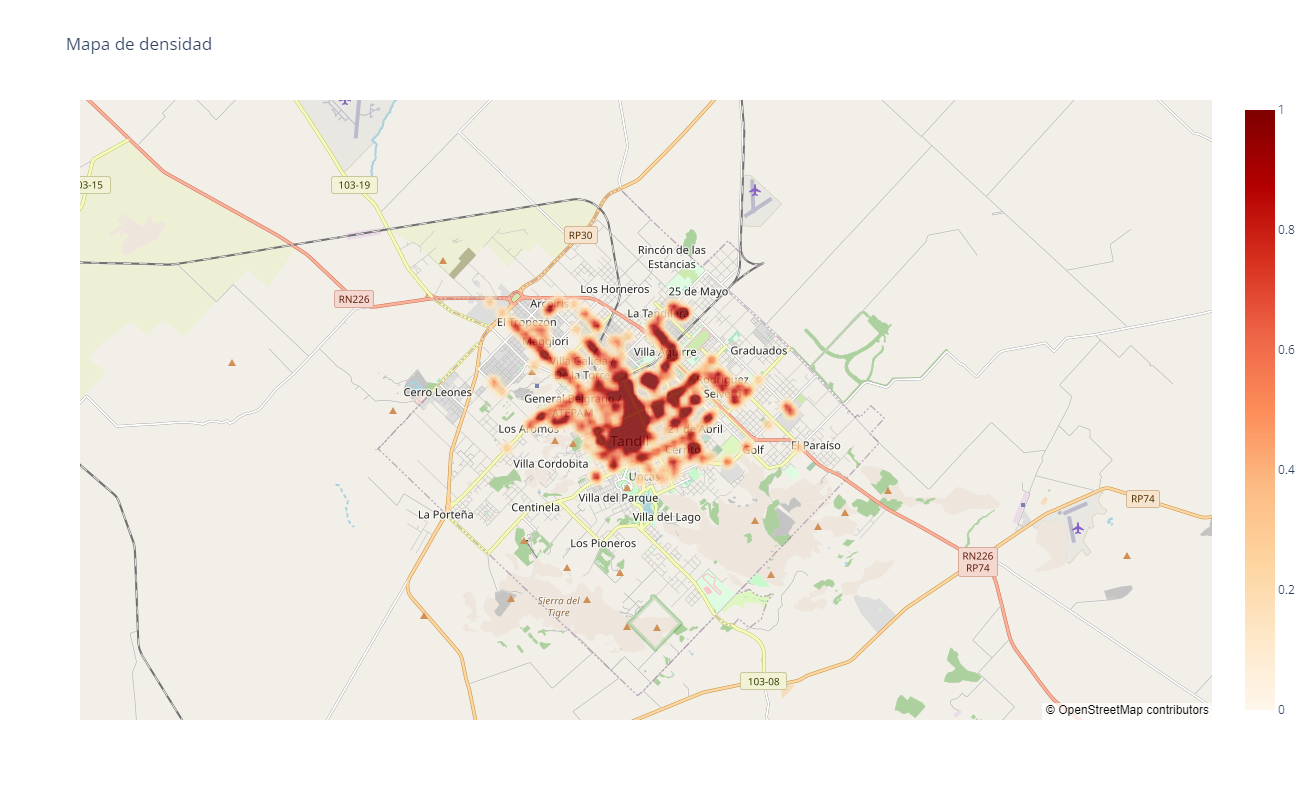

In [8]:
#DENSITY MAPBOX

fig = px.density_mapbox(
    result, 
    title="Mapa de densidad", 
    width=1000, 
    height=800, 
    lat="lat", 
    lon="lon",
    radius=10, 
    center=dict(lat=-37.32, lon=-59.13), 
    zoom=11, 
    mapbox_style="open-street-map", 
    labels={"lat":"Latitud","lon":"Longitud"},
    color_continuous_scale=px.colors.sequential.OrRd,
    opacity=0.8
    )
fig.show()

<b>CALC XY AND WRITE FILE</b>
<a id='calc-wrt'></a>
</br>[Go back to Index](#index)

In [9]:
#Como utilizamos oficialmente PosGAr 2007 faja 5 y los datos están en WGS84, reproyectamos con Geopandas
reprj_result = result.to_crs("EPSG:5347")

In [10]:
#Calculamos el valor de las coordenadas X e Y en PosGAr 2007 Faja 5
reprj_result["x"] = reprj_result.geometry.x
reprj_result["y"] = reprj_result.geometry.y

In [11]:
#Finalmente escribimos las geometrías en un archivo GeoJSON
reprj_result.to_file("Paradas_colectivos.json",driver="GeoJSON")